# ETF Stock Prediction Model

## 0. Import Main Libraries

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import datetime as dt

## 1. Web Scrap Vanguard S&P 500 ETF
In order to get freshly updated data everytime the program runs we will grab the data from yahoo finance:
https://ca.finance.yahoo.com/quote/VFV.TO/history?period1=1352332800&period2=1635120000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

**Will need to find a way to dynamically load all data from web page as of now I am only getting 100 rows**

**For now I will use the downloaded file**

In [436]:
# Import web scraping libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

In [437]:
'''
# Define url
SP500_url = 'https://ca.finance.yahoo.com/quote/VFV.TO/history?period1=1352332800&period2=1635120000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true'

# Set a User-Agent HTTP Header to access the yahoo server
headers = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:89.0) Gecko/20100101 Firefox/89.0"}

# Open url and pass into beautiful soup
# html = urlopen(SP500_url)
SP500_page = BeautifulSoup(requests.get(SP500_url, headers=headers).content, 'html.parser')

# Collect table headers
column_headers = SP500_page.findAll('tr')[0]
column_headers = [i.getText() for i in column_headers.findAll('th')]

# Convert headings to lowercase adn remove asterix's
for i in range(len(column_headers)):
    column_headers[i] = column_headers[i].lower()
    if column_headers[i][-1] == '*':
        column_headers[i] = column_headers[i][:-1]
    if column_headers[i][-1] == '*':
        column_headers[i] = column_headers[i][:-1]

# Finally collect all row data and fill dataframe
rows = SP500_page.findAll('tr')[1:]
print(rows[0].findAll('td')[0].getText()) # Check the most up to date-date (should be the last day the present market was open)

SP_data = []
for i in range(len(rows)):
    SP_data.append([col.getText() for col in rows[i].findAll('td')])
    
SP_df = pd.DataFrame(SP_data)


SP_df.tail()
'''

'\n# Define url\nSP500_url = \'https://ca.finance.yahoo.com/quote/VFV.TO/history?period1=1352332800&period2=1635120000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true\'\n\n# Set a User-Agent HTTP Header to access the yahoo server\nheaders = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:89.0) Gecko/20100101 Firefox/89.0"}\n\n# Open url and pass into beautiful soup\n# html = urlopen(SP500_url)\nSP500_page = BeautifulSoup(requests.get(SP500_url, headers=headers).content, \'html.parser\')\n\n# Collect table headers\ncolumn_headers = SP500_page.findAll(\'tr\')[0]\ncolumn_headers = [i.getText() for i in column_headers.findAll(\'th\')]\n\n# Convert headings to lowercase adn remove asterix\'s\nfor i in range(len(column_headers)):\n    column_headers[i] = column_headers[i].lower()\n    if column_headers[i][-1] == \'*\':\n        column_headers[i] = column_headers[i][:-1]\n    if column_headers[i][-1] == \'*\':\n        column_headers[i] = column_headers[i][:-1]\n\

### 1.1 Read in Data

In [14]:
VFV_df = pd.read_csv('data/VFV_TO.csv')
VFV_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2242,2021-10-19,98.959999,99.199997,98.650002,99.199997,99.199997,122100
2243,2021-10-20,99.250000,99.349998,98.980003,99.209999,99.209999,106000
2244,2021-10-21,99.250000,99.940002,98.980003,99.940002,99.940002,97500
2245,2021-10-22,100.000000,100.010002,99.410004,99.779999,99.779999,156900
2246,2021-10-25,100.029999,100.510002,99.730003,100.349998,100.349998,128700


### 1.2 Pre-process data

In [703]:
# Make columns lowercase
VFV_df.rename(str.lower, axis=1, inplace=True)
VFV_df.head()

,date,open,high,low,close,adj close,volume
0,2012-11-09,24.500000,24.690001,24.49,24.60,21.390457,2900
1,2012-11-12,24.600000,24.600000,24.57,24.57,21.364368,1200
2,2012-11-13,24.500000,24.660000,24.50,24.58,21.373070,4600
3,2012-11-14,24.430000,24.430000,24.41,24.41,21.225246,2600
4,2012-11-15,24.129999,24.160000,24.07,24.07,20.929604,37400


In [704]:
# Make date the index and remove other date column
VFV_df['date'] = pd.to_datetime(VFV_df.date, format='%Y-%m-%d')
VFV_df.index = VFV_df['date']
VFV_df.drop('date', axis=1, inplace=True)
VFV_df.head()

,open,high,low,close,adj close,volume
date,,,,,,
2012-11-09,24.500000,24.690001,24.49,24.60,21.390457,2900
2012-11-12,24.600000,24.600000,24.57,24.57,21.364368,1200
2012-11-13,24.500000,24.660000,24.50,24.58,21.373070,4600
2012-11-14,24.430000,24.430000,24.41,24.41,21.225246,2600
2012-11-15,24.129999,24.160000,24.07,24.07,20.929604,37400


In [705]:
# Check for NA data
VFV_df.isna().sum() # All good

open         0
high         0
low          0
close        0
adj close    0
volume       0
dtype: int64

In [706]:
VFV_df.dtypes

open         float64
high         float64
low          float64
close        float64
adj close    float64
volume         int64
dtype: object

### 1.3 View what we got

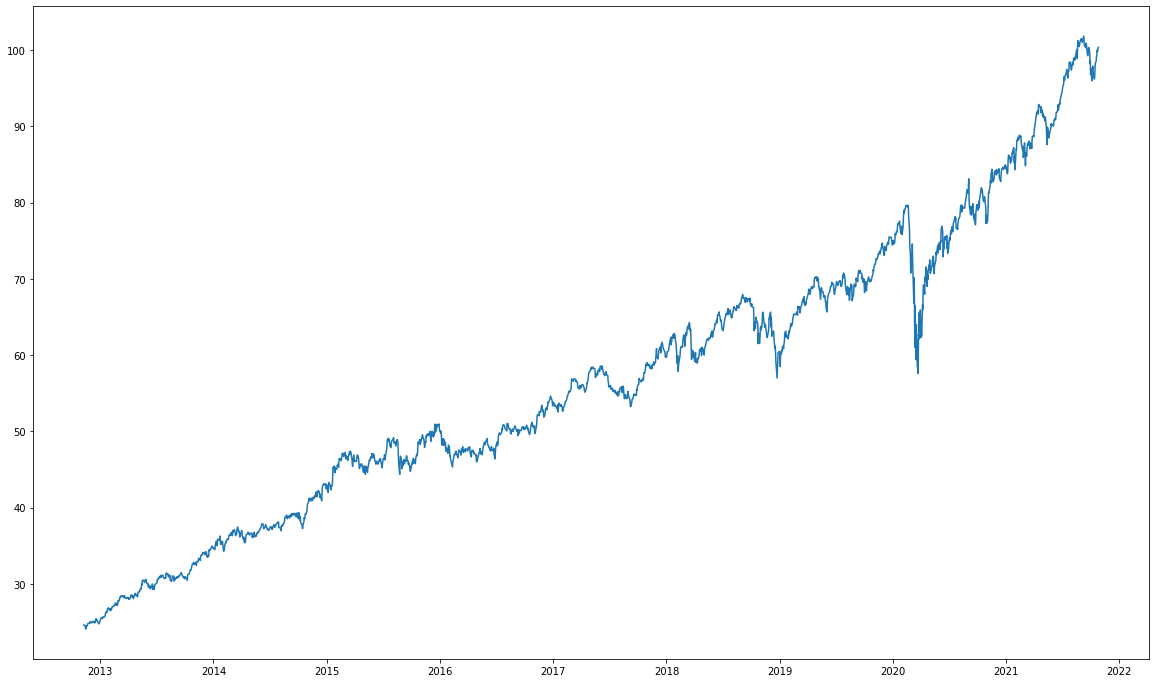

In [707]:
# Set figure and axis'
fig, ax = plt.subplots(figsize=(20,12))

# Plot figure
close = ax.plot(VFV_df['close'])

### 1.4 Calculate moving averages

In [708]:
# Define a function that will calculate moving averages
def calculate_ema_mov_avg(df, N=100):
    '''
    This function will return a dataframe with a new moving average 
    column given the dataframe and number of days that would like to be averaged
    1. Calculate Simple Moving Average (SMA)
    2. Calculate the weight multiplier for EMA
    3. Calculate the current Exponential Moving Average
    '''
    # Create a date array for indexing through data frame
    EMA_array = np.zeros(len(df))
    period_sum = 0
    n = str(N)
    
    for i in range(len(df)):
        if i < N:
            # Skip initial moving averages as there will be no data to calculate them
            i = i + 1
            continue
        # 1. Calculate Simple Moving Average
        for j in range(1,N+1):
            # 1.1 Calculate period sum
            period_sum = period_sum + df['close'].iloc[i-j]
        SMA = (N-period_sum)/N
        period_sum = 0 # Set back to 0 (******Look into easy optimization to avoid repeat summations in future)
        
        # 2. Calculate Weighted Average (k)
        k = 2 / (N + 1)
        
        # 3. Calculate Exponential Moving Average
        price_t = df['close'].iloc[i]
        EMA_y = EMA_array[i-1]
        EMA = ( price_t * k ) + (EMA_y * (1 - k))
        
        # 4. Put calculated EMA into EMA array
        EMA_array[i] = EMA
        
            
    df[n + '_day_ema'] = EMA_array
    return df
    
    
    

In [709]:
test_df = VFV_df
new_test_df = calculate_ema_mov_avg(test_df, N=10)
new_test_df = calculate_ema_mov_avg(test_df, N=25)
new_test_df = calculate_ema_mov_avg(test_df, N=50)
new_test_df = calculate_ema_mov_avg(test_df, N=75)
new_test_df = calculate_ema_mov_avg(test_df, N=100)
new_test_df = calculate_ema_mov_avg(test_df, N=150)
new_test_df = calculate_ema_mov_avg(test_df, N=200)
new_test_df.tail()

,open,high,low,close,adj close,volume,10_day_ema,25_day_ema,50_day_ema,75_day_ema,100_day_ema,150_day_ema,200_day_ema
date,,,,,,,,,,,,,
2021-10-19,98.959999,99.199997,98.650002,99.199997,99.199997,122100,97.952623,98.372628,98.409323,97.730426,96.828600,94.905999,93.056576
2021-10-20,99.250000,99.349998,98.980003,99.209999,99.209999,106000,98.181237,98.437041,98.440722,97.769362,96.875757,94.963005,93.117804
2021-10-21,99.250000,99.940002,98.980003,99.940002,99.940002,97500,98.501012,98.552654,98.499517,97.826485,96.936435,95.028926,93.185686
2021-10-22,100.000000,100.010002,99.410004,99.779999,99.779999,156900,98.733555,98.647065,98.549732,97.877893,96.992743,95.091854,93.251301
2021-10-25,100.029999,100.510002,99.730003,100.349998,100.349998,128700,99.027454,98.778060,98.620331,97.942948,97.059223,95.161498,93.321935


In [710]:
VFV_df['close'].iloc[100]

28.0

In [272]:
VFV_df.iloc[100]

open              27.950001
high              28.000000
low               27.860001
close             28.000000
adj close         24.587620
volume         48700.000000
10_day_ema        28.103164
25_day_ema        27.952721
50_day_ema        24.263947
75_day_ema        14.095191
100_day_ema        0.554455
150_day_ema        0.000000
200_day_ema        0.000000
Name: 2013-04-05 00:00:00, dtype: float64

In [273]:
len(VFV_df)

2247

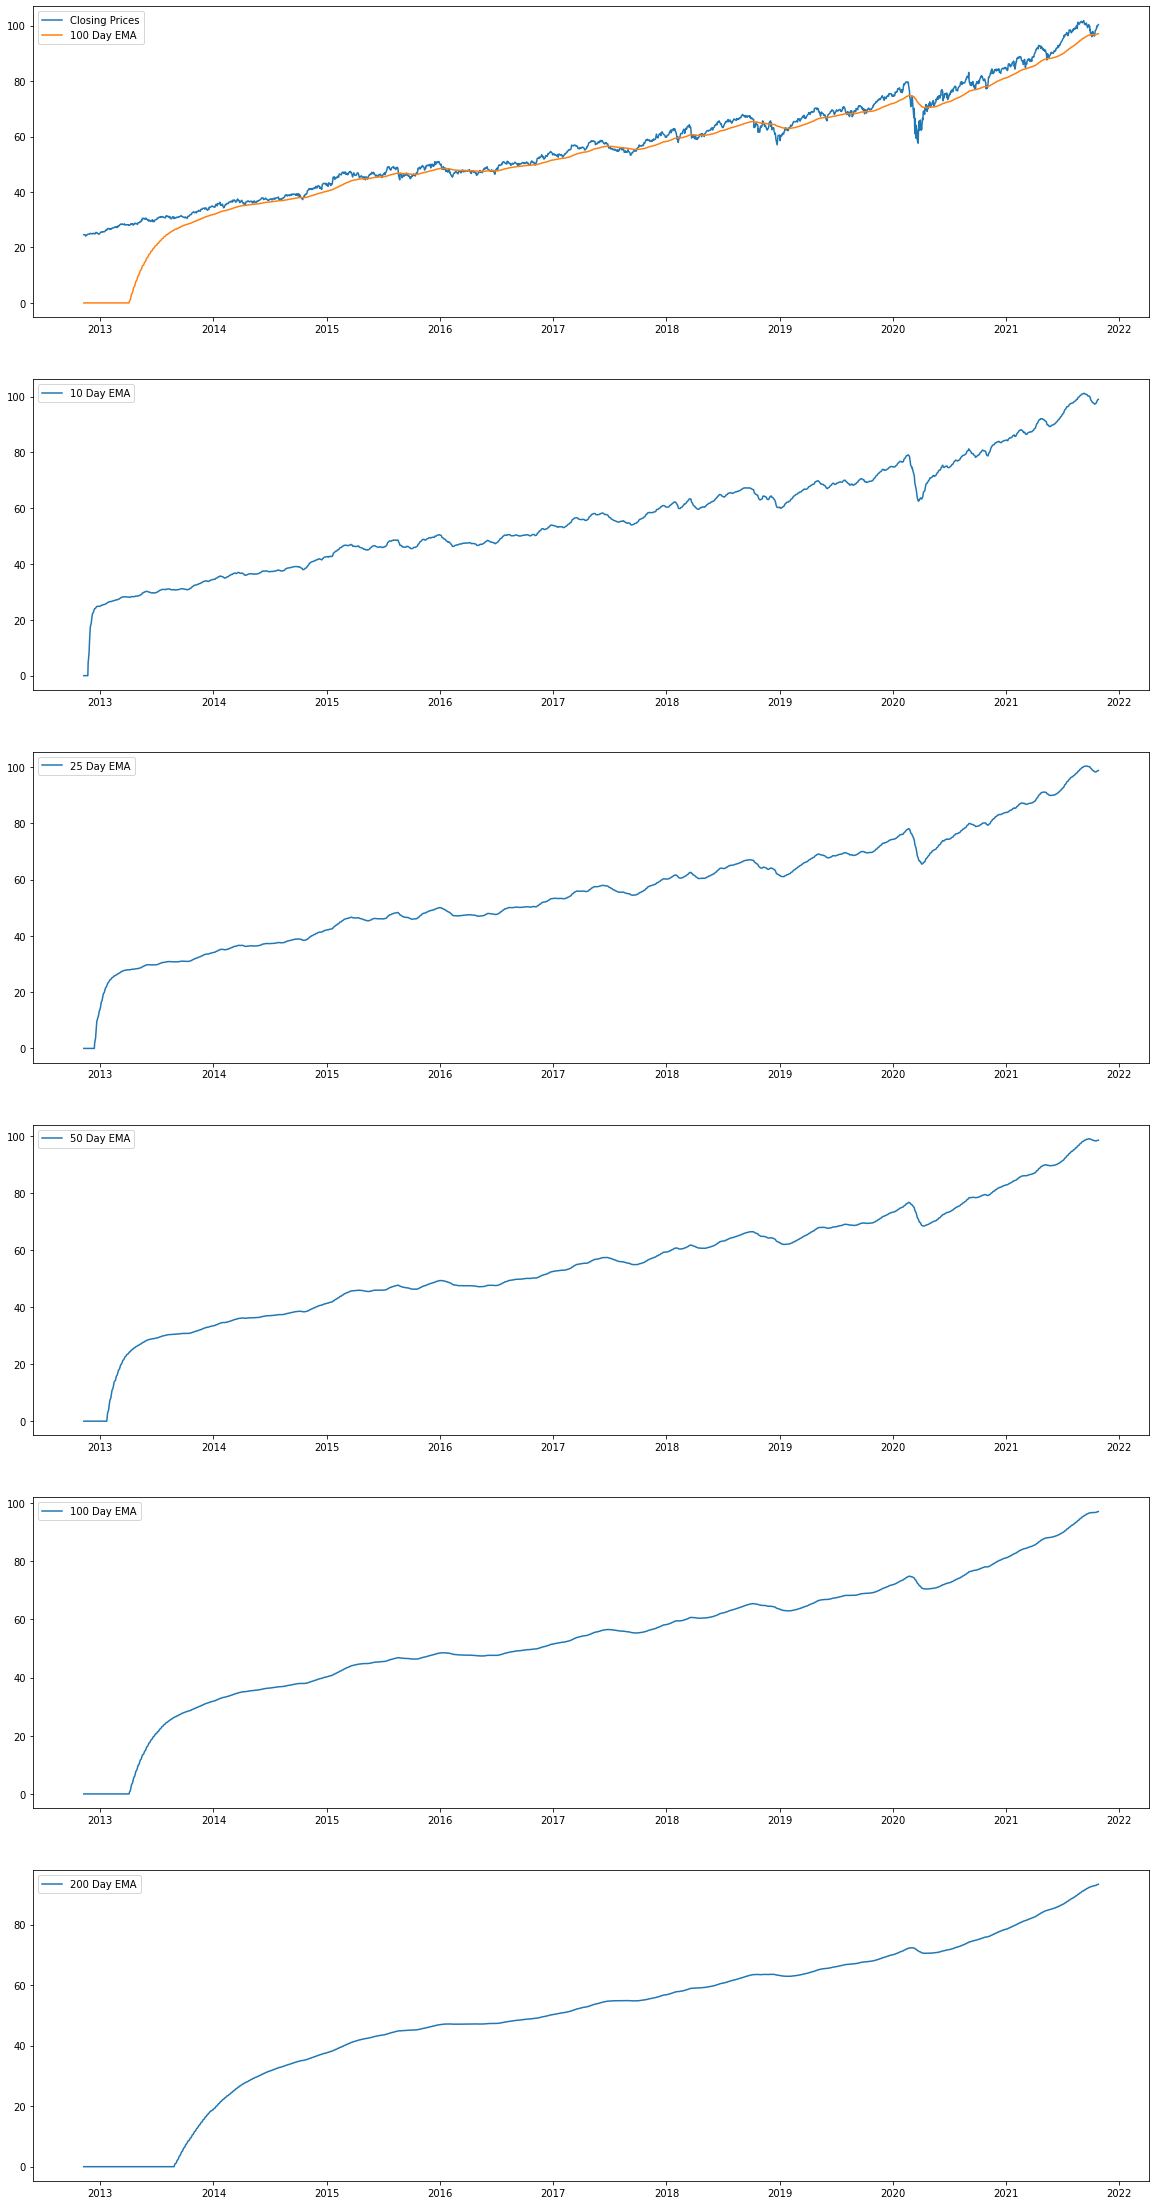

In [711]:
# Plot N day EMA vs Closing prices 
# Set figure and axis'
fig, (ax0, ax1,ax2, ax3,ax4, ax5) = plt.subplots(nrows=6,
                                                         ncols=1,
                                                         figsize=(20,40));
# Plot figures
close, = ax0.plot(VFV_df['close'])
close.set_label('Closing Prices')
ema_100, = ax0.plot(VFV_df['100_day_ema'])
ema_100.set_label('100 Day EMA')
ax0.legend()

ema_10, = ax1.plot(VFV_df['10_day_ema'])
ema_10.set_label('10 Day EMA')
ax1.legend()

ema_25, = ax2.plot(VFV_df['25_day_ema'])
ema_25.set_label('25 Day EMA')
ax2.legend()

ema_50, = ax3.plot(VFV_df['50_day_ema'])
ema_50.set_label('50 Day EMA')
ax3.legend()

ema_100, = ax4.plot(VFV_df['100_day_ema'])
ema_100.set_label('100 Day EMA')
ax4.legend()

ema_200, = ax5.plot(VFV_df['200_day_ema'])
ema_200.set_label('200 Day EMA')
ax5.legend()

# Cusomize
#ax.set(title='Moving Averages of VFV.TO',
#      xlabel='Date',
#      ylabel='Price')
#ax.legend(title='Trends')



In [ ]:
# VFV_df.drop('400_day_ema', axis=1,inplace=True)

In [321]:
VFV_df.iloc[100]

open              27.950001
high              28.000000
low               27.860001
close             28.000000
adj close         24.587620
volume         48700.000000
10_day_ema        28.103164
25_day_ema        27.952721
50_day_ema        24.263947
75_day_ema        14.095191
100_day_ema        0.554455
150_day_ema        0.000000
200_day_ema        0.000000
Name: 2013-04-05 00:00:00, dtype: float64

## 2. Long Short-Term Memory (LSTM) Implementation

In [13]:
# Import LSTM Libraries
from sklearn.preprocessing import MinMaxScaler
from keras. models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [15]:
# Get the training split size 
training_size = int((len(VFV_df) * 0.8)) # Split 80% for training data
training_size

1797

In [714]:
# Import csv
# df = pd.read_csv('data/VFV_TO.csv')
# Make columns lowercase
# df.rename(str.lower, axis=1, inplace=True)

# Isolate closing prices data
# data = df.sort_index(ascending=True, axis=0)
# new_data = pd.DataFrame(index=range(0,len(df)),columns=['date', 'close'])
# for i in range(0,len(data)):
#    new_data['date'][i] = data['date'][i]
#    new_data['close'][i] = data['close'][i]
    
#setting index
#new_data.index = new_data.date
#new_data.drop('date', axis=1, inplace=True)

In [16]:
# Set some variables 
close_idx = 3
EMA_100_idx = 10
num_past_vals = 100

In [716]:
# Create Train and Validation Test sets
new_data = VFV_df
dataset = new_data.values
train = np.array(dataset[0:training_size, close_idx])
valid = np.array(dataset[training_size:, close_idx])
len(train), len(valid)
train

array([24.6     , 24.57    , 24.58    , ..., 74.730003, 75.199997,
       75.940002])

In [717]:
# Feature scale and make X_train, y_train data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset[:,close_idx].reshape(-1,1))

In [718]:
# Function to fill x_train data coresponding to the column want to do close and EMA_100

def fill_train_data(npv, train):
    x_train, y_train = [], []
    for i in range(npv, len(train)):
        x_train.append(scaled_data[i-npv:i]) 
        y_train.append(scaled_data[i])
    
    # Convert arrays to numpy for efficiency and manipulation
    x_train, y_train = np.array(x_train), np.array(y_train)
    
    return x_train, y_train

In [719]:
# Set number of past values used for predictions **********MAKE FUNCTION LATER
# num_past_vals = 100

# Fill x_train with arrays holding past n values from index i, fill y_train with the values at index i
#x_train, y_train = [], []
#for i in range(num_past_vals, len(train)):
#    x_train.append(scaled_data[i-num_past_vals:i]) 
#    y_train.append(scaled_data[i])
    
# Convert arrays to numpy for efficiency and manipulation
#x_train, y_train = np.array(x_train), np.array(y_train)

In [720]:
x_train, y_train = fill_train_data(num_past_vals, train)

In [721]:
x_train.shape, y_train.shape

((1697, 100, 1), (1697, 1))

In [722]:
# Reshape x_train array to fit a third dimension (1)
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [723]:
# Create and fit the LSTM Network Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_31 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [724]:
# Compile and fit the LSTM model
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=1)

1697/1697 [==============================] - 34s 20ms/step - loss: 6.4860e-04


In [725]:
# Predicting 450 values (length of valid data) using past 100 (num_past_values) from the training set 
inputs = VFV_df['close'][len(VFV_df) - len(valid) - num_past_vals:].values # End values from actual data
len(inputs), len(VFV_df), len(valid), num_past_vals
#inputs = VFV_df['close'][num_past_vals:len(train)].values
#len(inputs)

(550, 2247, 450, 100)

In [726]:
inputs.shape

(550,)

In [727]:
# Transpose the array (makes a column, instead of row)
inputs = inputs.reshape(-1,1) 
inputs

array([[ 68.239998],
       [ 69.300003],
       [ 68.699997],
       [ 69.129997],
       [ 69.129997],
       [ 67.139999],
       [ 67.739998],
       [ 67.849998],
       [ 68.330002],
       [ 69.169998],
       [ 69.309998],
       [ 68.949997],
       [ 69.129997],
       [ 70.120003],
       [ 69.860001],
       [ 69.769997],
       [ 69.650002],
       [ 70.43    ],
       [ 70.800003],
       [ 71.099998],
       [ 70.739998],
       [ 70.889999],
       [ 71.089996],
       [ 70.970001],
       [ 70.760002],
       [ 70.650002],
       [ 69.959999],
       [ 70.260002],
       [ 70.080002],
       [ 69.550003],
       [ 69.980003],
       [ 68.949997],
       [ 68.199997],
       [ 68.800003],
       [ 69.669998],
       [ 69.470001],
       [ 68.419998],
       [ 69.010002],
       [ 69.269997],
       [ 69.610001],
       [ 70.239998],
       [ 70.050003],
       [ 69.940002],
       [ 69.610001],
       [ 69.839996],
       [ 69.650002],
       [ 69.720001],
       [ 69.8

In [728]:
# Scale inputs
inputs = scaler.transform(inputs)
inputs

array([[0.56810287],
       [0.58173637],
       [0.57401925],
       [0.5795498 ],
       [0.5795498 ],
       [0.55395497],
       [0.561672  ],
       [0.56308679],
       [0.56926048],
       [0.58006428],
       [0.58186493],
       [0.57723469],
       [0.5795498 ],
       [0.592283  ],
       [0.58893892],
       [0.58778131],
       [0.58623797],
       [0.5962701 ],
       [0.60102898],
       [0.60488743],
       [0.60025721],
       [0.60218648],
       [0.60475879],
       [0.60321545],
       [0.6005145 ],
       [0.5990997 ],
       [0.59022507],
       [0.59408363],
       [0.59176851],
       [0.58495181],
       [0.59048235],
       [0.57723469],
       [0.56758839],
       [0.5753055 ],
       [0.58649515],
       [0.58392284],
       [0.57041798],
       [0.57800646],
       [0.58135044],
       [0.58572349],
       [0.59382634],
       [0.59138268],
       [0.58996787],
       [0.58572349],
       [0.58868162],
       [0.58623797],
       [0.58713828],
       [0.589

In [625]:
inputs.shape

(451, 1)

In [729]:
X_test = []
for i in range(num_past_vals,len(inputs)):
    X_test.append(inputs[i-num_past_vals:i,0])
X_test = np.array(X_test)

In [730]:
X_test.shape

(450, 100)

In [731]:
X_test

array([[0.56810287, 0.58173637, 0.57401925, ..., 0.6515756 , 0.65762054,
        0.66713829],
       [0.58173637, 0.57401925, 0.5795498 , ..., 0.65762054, 0.66713829,
        0.66418005],
       [0.57401925, 0.5795498 , 0.5795498 , ..., 0.66713829, 0.66418005,
        0.67048228],
       ...,
       [0.85183284, 0.84990356, 0.84977491, ..., 0.95807071, 0.96630221,
        0.96643086],
       [0.84990356, 0.84977491, 0.84823147, ..., 0.96630221, 0.96643086,
        0.97581996],
       [0.84977491, 0.84823147, 0.85093251, ..., 0.96643086, 0.97581996,
        0.97376205]])

In [732]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)
X_test.shape

(450, 100, 1)

In [733]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

13.312991603473796

In [734]:
pd.options.mode.chained_assignment = None  # default='warn'
train = new_data.iloc[:training_size, :]
valid = new_data.iloc[training_size:, :]
valid['predictions'] = closing_price
valid

,open,high,low,close,adj close,volume,10_day_ema,25_day_ema,50_day_ema,75_day_ema,100_day_ema,150_day_ema,200_day_ema,predictions
date,,,,,,,,,,,,,,
2020-01-10,76.010002,76.010002,75.599998,75.709999,73.948265,51400,75.164972,74.661097,73.738164,72.948392,72.295246,71.231795,70.351419,73.788895
2020-01-13,75.809998,76.199997,75.699997,76.199997,74.426857,68300,75.353158,74.779474,73.834707,73.033961,72.372568,71.297599,70.409613,73.882912
2020-01-14,76.220001,76.300003,75.989998,76.089996,74.319420,79900,75.487129,74.880284,73.923149,73.114383,72.446181,71.361074,70.466135,74.016998
2020-01-15,76.209999,76.400002,76.000000,76.160004,74.387802,59200,75.609470,74.978724,74.010869,73.194531,72.519722,71.424636,70.522790,74.154465
2020-01-16,76.580002,76.769997,76.480003,76.769997,74.983597,46200,75.820475,75.116514,74.119070,73.288622,72.603885,71.495435,70.584951,74.289925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-19,98.959999,99.199997,98.650002,99.199997,99.199997,122100,97.952623,98.372628,98.409323,97.730426,96.828600,94.905999,93.056576,93.794121
2021-10-20,99.250000,99.349998,98.980003,99.209999,99.209999,106000,98.181237,98.437041,98.440722,97.769362,96.875757,94.963005,93.117804,93.983818
2021-10-21,99.250000,99.940002,98.980003,99.940002,99.940002,97500,98.501012,98.552654,98.499517,97.826485,96.936435,95.028926,93.185686,94.202789


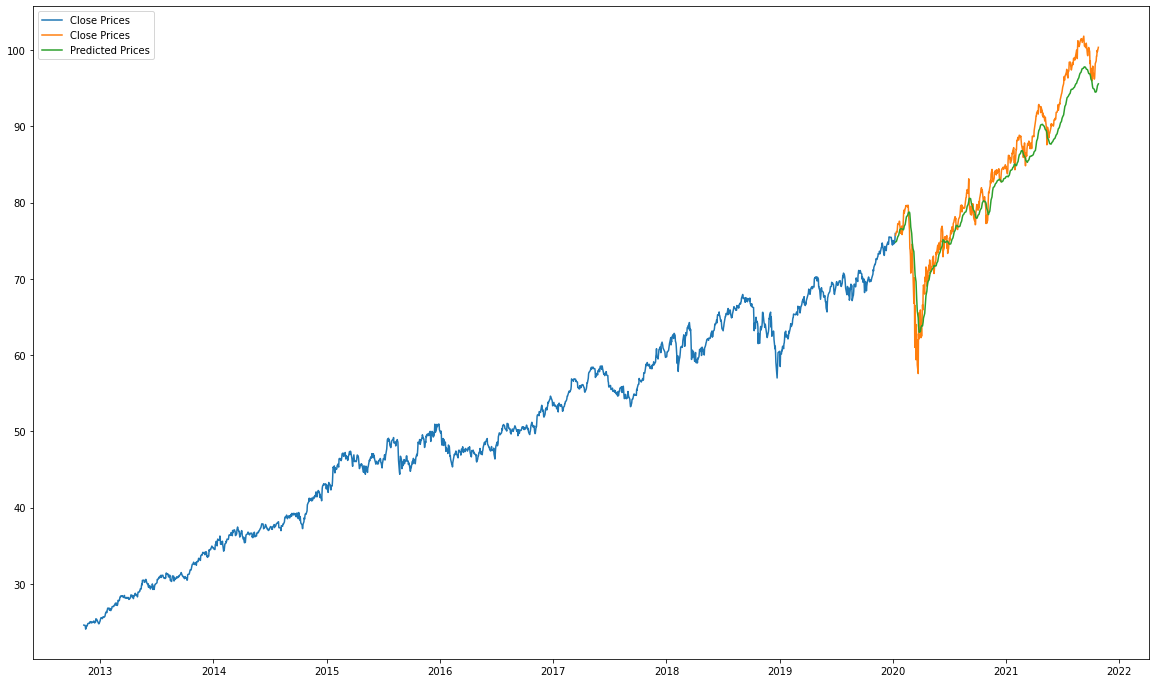

In [537]:
fig, ax = plt.subplots(figsize=(20,12))
train_close, = ax.plot(train['close'])
valid_close, = ax.plot(valid['close'])
prediction_close, = ax.plot(valid['predictions'])

train_close.set_label('Close Prices')
valid_close.set_label('Close Prices')
prediction_close.set_label('Predicted Prices')
ax.legend()

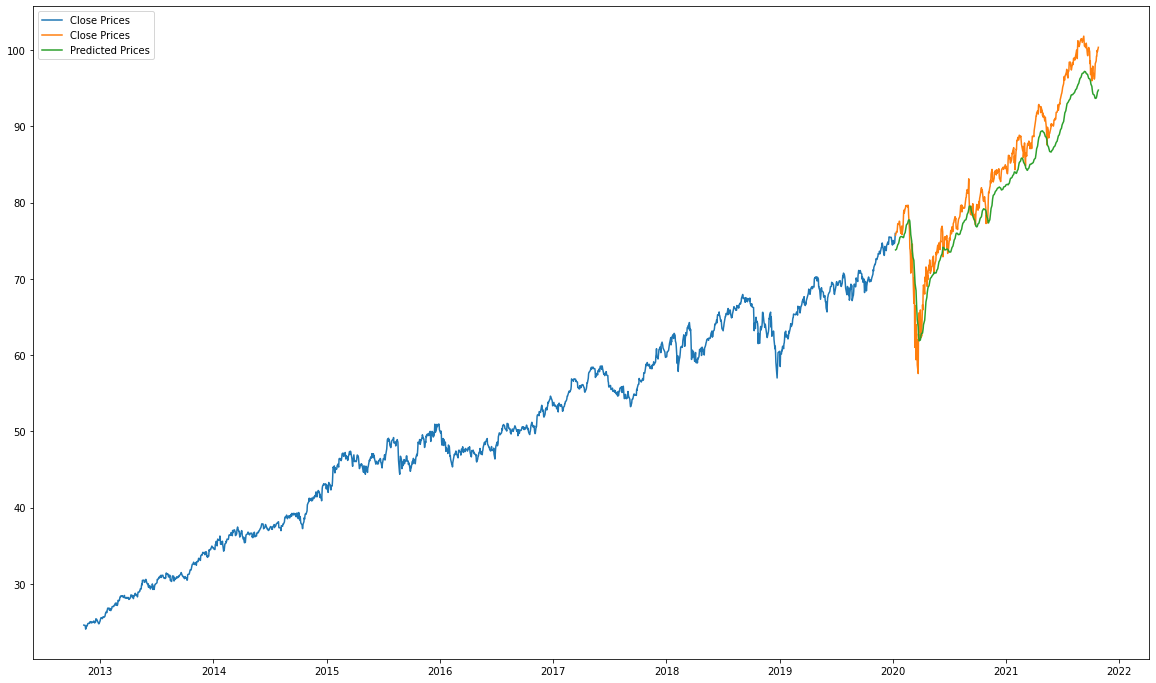

In [735]:
fig, ax = plt.subplots(figsize=(20,12))
train_close, = ax.plot(train['close'])
valid_close, = ax.plot(valid['close'])
prediction_close, = ax.plot(valid['predictions'])

train_close.set_label('Close Prices')
valid_close.set_label('Close Prices')
prediction_close.set_label('Predicted Prices')
ax.legend()

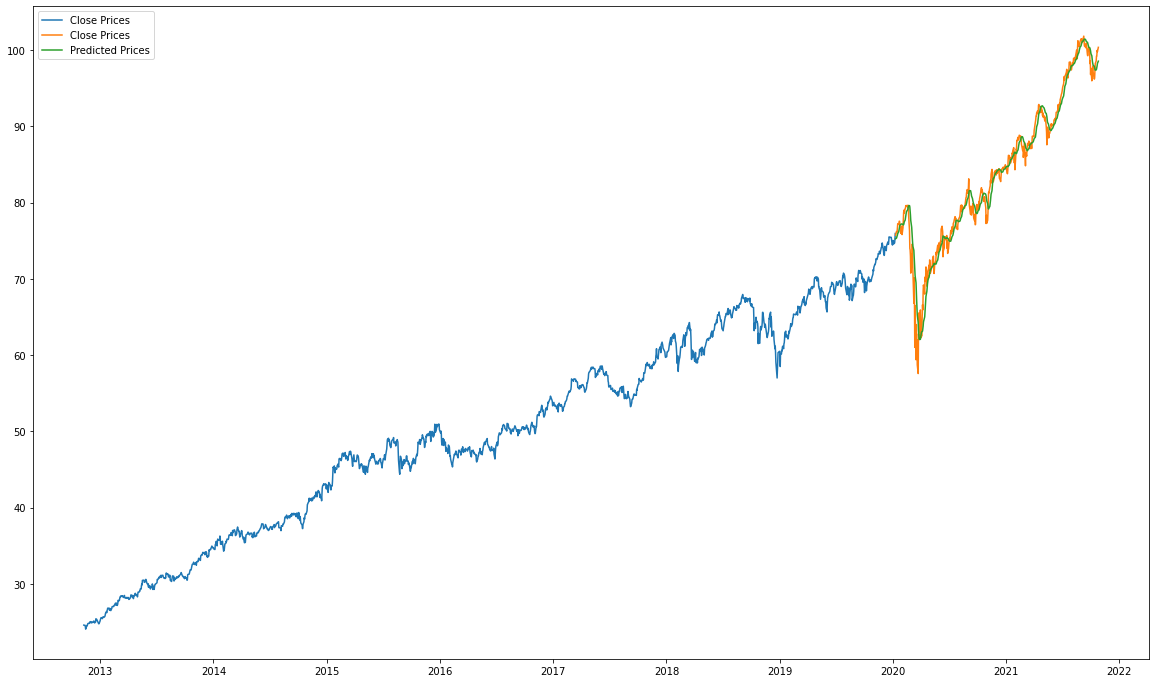

In [602]:
fig, ax = plt.subplots(figsize=(20,12))
train_close, = ax.plot(train['close'])
valid_close, = ax.plot(valid['close'])
prediction_close, = ax.plot(valid['predictions'])

train_close.set_label('Close Prices')
valid_close.set_label('Close Prices')
prediction_close.set_label('Predicted Prices')
ax.legend()

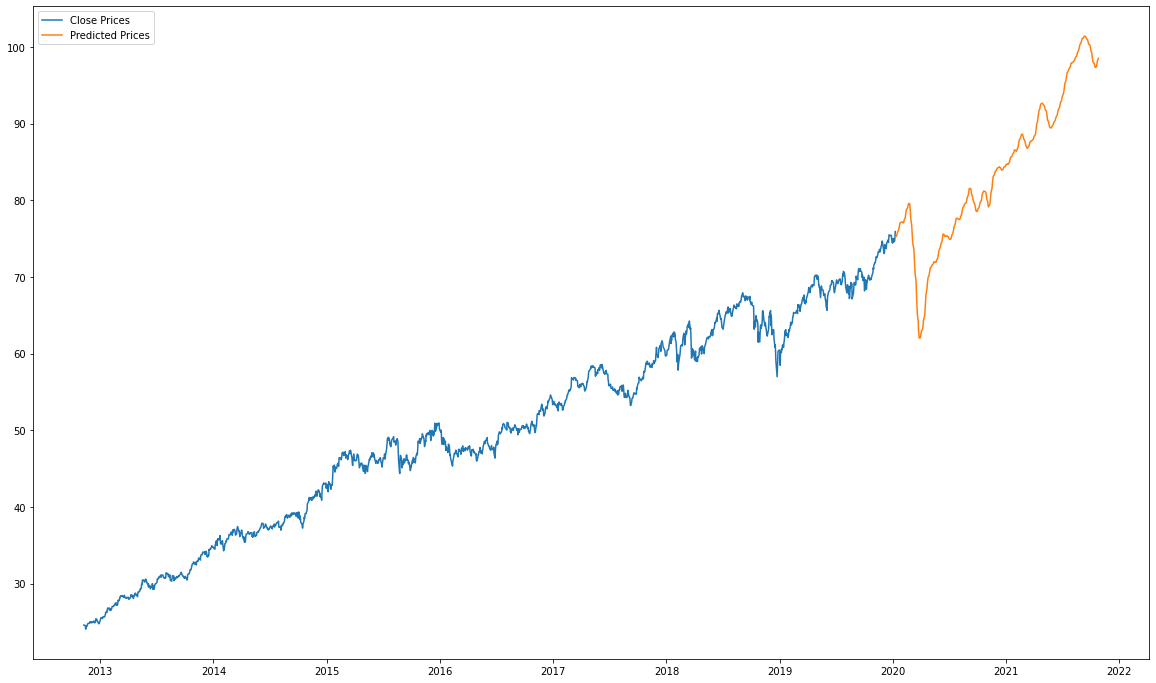

In [605]:
fig, ax = plt.subplots(figsize=(20,12))
train_close, = ax.plot(train['close'])
prediction_close, = ax.plot(valid['predictions'])

train_close.set_label('Close Prices')
prediction_close.set_label('Predicted Prices')
ax.legend()

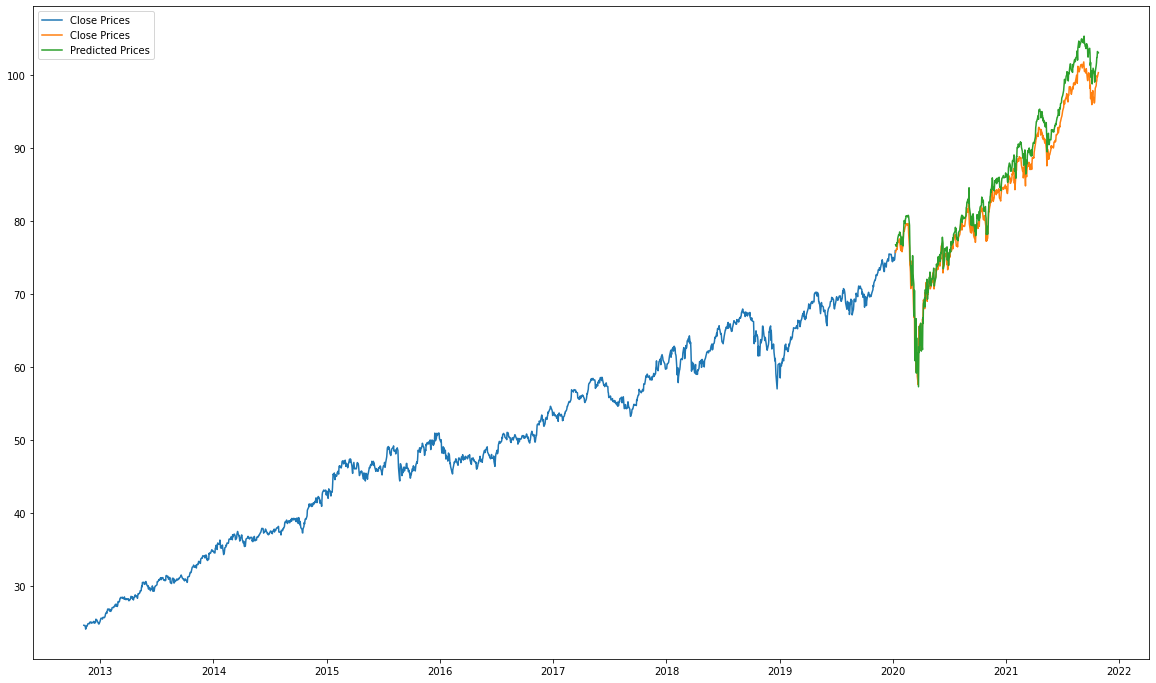

In [631]:
fig, ax = plt.subplots(figsize=(20,12))
train_close, = ax.plot(train['close'])
valid_close, = ax.plot(valid['close'])
prediction_close, = ax.plot(valid['predictions'])

train_close.set_label('Close Prices')
valid_close.set_label('Close Prices')
prediction_close.set_label('Predicted Prices')
ax.legend()

In [736]:
VFV_df_2 = pd.read_csv('data/VFV_TO_2.csv')
VFV_df_2.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2245,2021-10-22,100.000000,100.010002,99.410004,99.779999,99.779999,156900
2246,2021-10-25,100.029999,100.510002,99.730003,100.349998,100.349998,128700
2247,2021-10-26,100.540001,101.019997,100.500000,100.550003,100.550003,119600
2248,2021-10-27,100.800003,101.019997,99.889999,99.910004,99.910004,174400
2249,2021-10-28,100.190002,100.660004,100.190002,100.660004,100.660004,89200


In [737]:
# Make columns lowercase
VFV_df_2.rename(str.lower, axis=1, inplace=True)
VFV_df_2

,date,open,high,low,close,adj close,volume
0,2012-11-09,24.500000,24.690001,24.490000,24.600000,21.390455,2900
1,2012-11-12,24.600000,24.600000,24.570000,24.570000,21.364367,1200
2,2012-11-13,24.500000,24.660000,24.500000,24.580000,21.373068,4600
3,2012-11-14,24.430000,24.430000,24.410000,24.410000,21.225248,2600
4,2012-11-15,24.129999,24.160000,24.070000,24.070000,20.929607,37400
...,...,...,...,...,...,...,...
2245,2021-10-22,100.000000,100.010002,99.410004,99.779999,99.779999,156900
2246,2021-10-25,100.029999,100.510002,99.730003,100.349998,100.349998,128700
2247,2021-10-26,100.540001,101.019997,100.500000,100.550003,100.550003,119600
2248,2021-10-27,100.800003,101.019997,99.889999,99.910004,99.910004,174400


In [738]:
VFV_df_2['date'] = pd.to_datetime(VFV_df_2.date, format='%Y-%m-%d')
VFV_df_2.index = VFV_df_2['date']
VFV_df_2.drop('date', axis=1, inplace=True)
VFV_df_2.head()

,open,high,low,close,adj close,volume
date,,,,,,
2012-11-09,24.500000,24.690001,24.49,24.60,21.390455,2900
2012-11-12,24.600000,24.600000,24.57,24.57,21.364367,1200
2012-11-13,24.500000,24.660000,24.50,24.58,21.373068,4600
2012-11-14,24.430000,24.430000,24.41,24.41,21.225248,2600
2012-11-15,24.129999,24.160000,24.07,24.07,20.929607,37400


In [739]:
inputs = VFV_df_2['close'].values
inputs

array([ 24.6     ,  24.57    ,  24.58    , ..., 100.550003,  99.910004,
       100.660004])

In [740]:
inputs = inputs.reshape(-1,1)

In [741]:
inputs = scaler.transform(inputs)
inputs

array([[0.00681672],
       [0.00643087],
       [0.00655949],
       ...,
       [0.98366563],
       [0.97543414],
       [0.98508044]])

In [742]:
new_test = []
for i in range(num_past_vals,len(inputs)):
    new_test.append(inputs[i-num_past_vals:i,0])
new_test = np.array(new_test)

In [743]:
pd.DataFrame(new_test)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.006817,0.006431,0.006559,0.004373,0.000000,0.001929,0.006045,0.005916,0.007588,0.009389,...,0.052990,0.053248,0.051961,0.052862,0.052605,0.053633,0.052090,0.053376,0.050161,0.050289
1,0.006431,0.006559,0.004373,0.000000,0.001929,0.006045,0.005916,0.007588,0.009389,0.009518,...,0.053248,0.051961,0.052862,0.052605,0.053633,0.052090,0.053376,0.050161,0.050289,0.050547
2,0.006559,0.004373,0.000000,0.001929,0.006045,0.005916,0.007588,0.009389,0.009518,0.010289,...,0.051961,0.052862,0.052605,0.053633,0.052090,0.053376,0.050161,0.050289,0.050547,0.052733
3,0.004373,0.000000,0.001929,0.006045,0.005916,0.007588,0.009389,0.009518,0.010289,0.009775,...,0.052862,0.052605,0.053633,0.052090,0.053376,0.050161,0.050289,0.050547,0.052733,0.054277
4,0.000000,0.001929,0.006045,0.005916,0.007588,0.009389,0.009518,0.010289,0.009775,0.009775,...,0.052605,0.053633,0.052090,0.053376,0.050161,0.050289,0.050547,0.052733,0.054277,0.057749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,0.849904,0.849775,0.848231,0.850933,0.858778,0.858392,0.861736,0.859679,0.863408,0.871511,...,0.949453,0.940064,0.927460,0.929260,0.943923,0.953569,0.958071,0.966302,0.966431,0.975820
2146,0.849775,0.848231,0.850933,0.858778,0.858392,0.861736,0.859679,0.863408,0.871511,0.871768,...,0.940064,0.927460,0.929260,0.943923,0.953569,0.958071,0.966302,0.966431,0.975820,0.973762
2147,0.848231,0.850933,0.858778,0.858392,0.861736,0.859679,0.863408,0.871511,0.871768,0.874212,...,0.927460,0.929260,0.943923,0.953569,0.958071,0.966302,0.966431,0.975820,0.973762,0.981093
2148,0.850933,0.858778,0.858392,0.861736,0.859679,0.863408,0.871511,0.871768,0.874212,0.874984,...,0.929260,0.943923,0.953569,0.958071,0.966302,0.966431,0.975820,0.973762,0.981093,0.983666


In [747]:
new_test = np.reshape(new_test, (new_test.shape[0],new_test.shape[1],1))
prices = model.predict(new_test)
prices = scaler.inverse_transform(prices)
prices.size

2150

In [755]:
test_df = VFV_df_2.iloc[num_past_vals:,:]

In [756]:
test_df['preds'] = prices

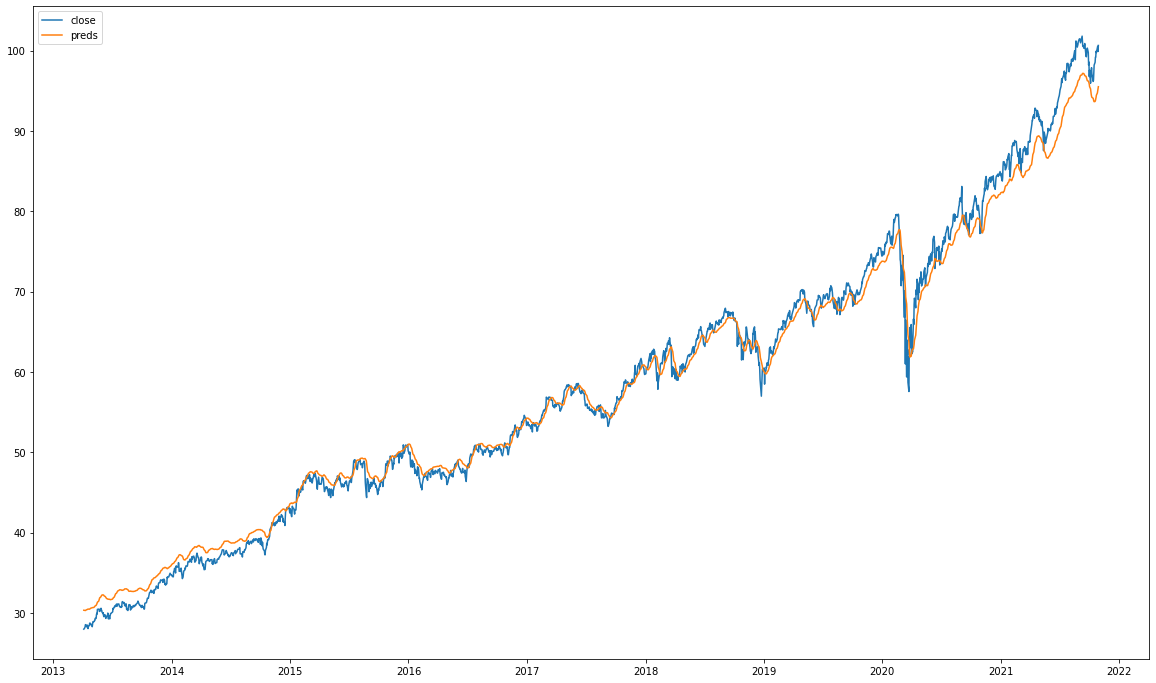

In [759]:
fig, ax = plt.subplots(figsize=(20,12))
close, = ax.plot(test_df['close'])
preds, = ax.plot(test_df['preds'])
close.set_label('close')
preds.set_label('preds')
ax.legend()

In [750]:
VFV_df_2.shape

(2250, 6)

In [760]:
VFV_df

,open,high,low,close,adj close,volume,10_day_ema,25_day_ema,50_day_ema,75_day_ema,100_day_ema,150_day_ema,200_day_ema
date,,,,,,,,,,,,,
2012-11-09,24.500000,24.690001,24.490000,24.600000,21.390457,2900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-11-12,24.600000,24.600000,24.570000,24.570000,21.364368,1200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-11-13,24.500000,24.660000,24.500000,24.580000,21.373070,4600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-11-14,24.430000,24.430000,24.410000,24.410000,21.225246,2600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-11-15,24.129999,24.160000,24.070000,24.070000,20.929604,37400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-19,98.959999,99.199997,98.650002,99.199997,99.199997,122100,97.952623,98.372628,98.409323,97.730426,96.828600,94.905999,93.056576
2021-10-20,99.250000,99.349998,98.980003,99.209999,99.209999,106000,98.181237,98.437041,98.440722,97.769362,96.875757,94.963005,93.117804
2021-10-21,99.250000,99.940002,98.980003,99.940002,99.940002,97500,98.501012,98.552654,98.499517,97.826485,96.936435,95.028926,93.185686


In [776]:
train = VFV_df[:training_size]
valid = VFV_df[training_size:]

In [777]:
X_train = train.drop('close', axis=1)
y_train = train['close']
X_valid = valid.drop('close', axis=1)
y_valid = valid['close']

In [778]:
from sklearn.linear_model import LinearRegression
LG_model = LinearRegression()
LG_model.fit(X_train, y_train)

LinearRegression()

In [779]:
LG_preds = LG_model.predict(X_valid)

In [780]:
valid['preds'] = LG_preds

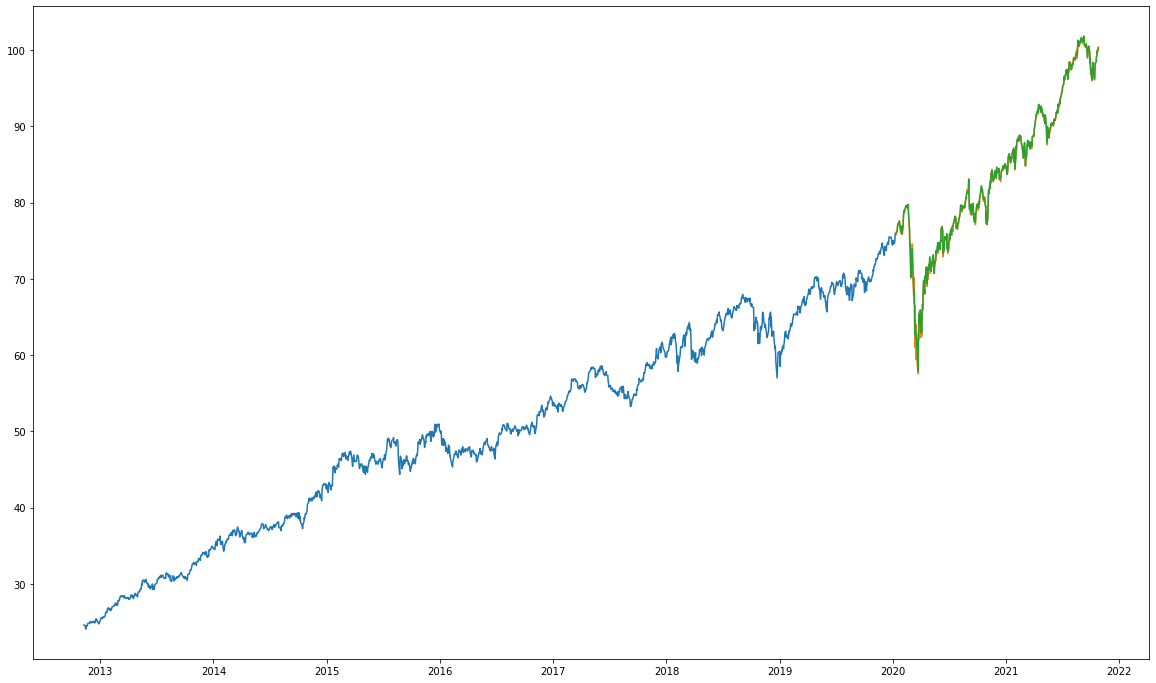

In [781]:
fig, ax = plt.subplots(figsize=(20,12))
train_close, = ax.plot(train['close'])
valid_close, = ax.plot(valid['close'])
preds_close = ax.plot(valid['preds'])

In [188]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i-1]
        diff.append(value)
    return np.array(diff)

In [190]:
def predict_1(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat = yhat + coef[i] * history[-i]
    return yhat

In [248]:
df = pd.read_csv('data/VFV_TO_2.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [247]:
close_series = df['Close']

Date
2012-11-09    24.60
2012-11-12    24.57
2012-11-13    24.58
2012-11-14    24.41
2012-11-15    24.07
Name: Close, dtype: float64

In [206]:
X = difference(close_series.values)

array([-0.03    ,  0.01    , -0.17    , ...,  0.200005, -0.639999,
        0.75    ])

In [200]:
train, test = X[:training_size], X[training_size:]

In [271]:
window_size = 500

In [272]:
# Train the auto regression
AR_model = AutoReg(train, lags=window_size) #trend='t')
AR_fit = AR_model.fit()
coef = AR_fit.params

In [273]:
# Walk forward over time steps
history = [train[i] for i in range(len(train))]
predictions = []

In [274]:
for t in range(len(test)):
    yhat = predict_1(coef, history)
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)

In [275]:
rmse = sqrt(mean_squared_error(test, predictions))
rmse

1.3908736717986918

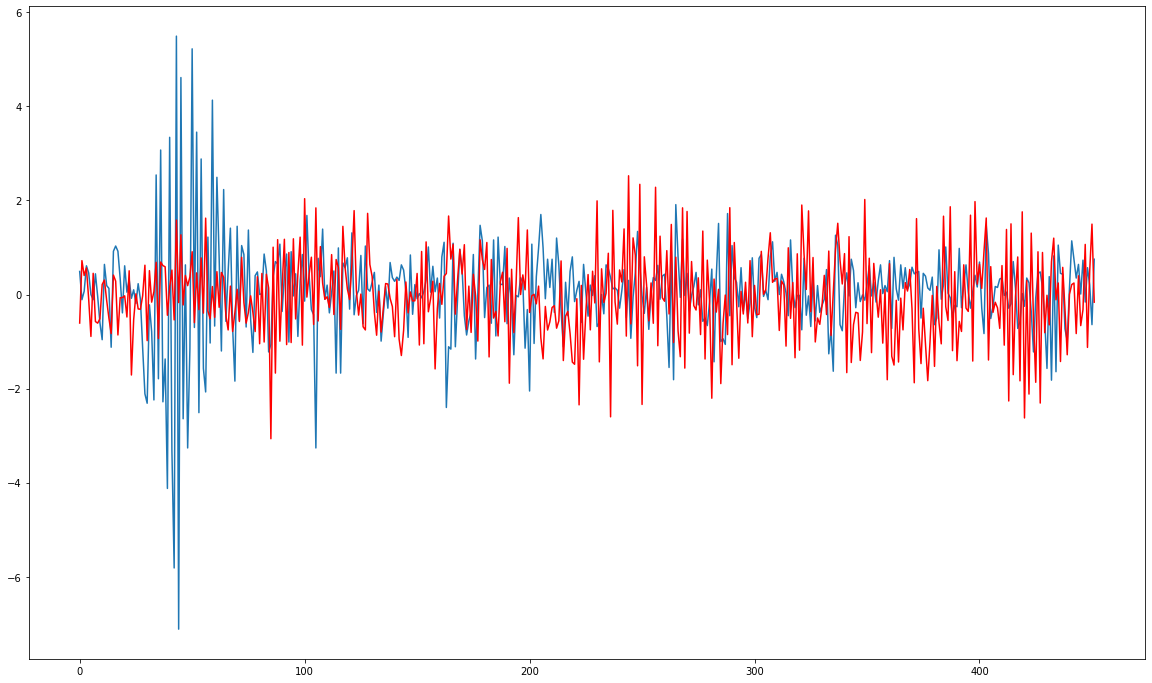

In [276]:
fig, ax = plt.subplots(figsize=(20,12))
ax.plot(test)
ax.plot(predictions, color='red')
#ax.plot(train)

In [277]:
# Save model
AR_fit.save('models/ar_model.pkl')

In [278]:
# Save difference set
np.save('data/difference_sets/ar_diff_data_1.npy', X)

In [279]:
# Save the last observation
np.save('data/observations/ar_obs.npy', [series.values[-1]])
series.values[-1]

100.660004

In [280]:
from statsmodels.tsa.ar_model import AutoRegResults

In [281]:
# Load AR model from file
loaded = AutoRegResults.load('models/ar_model.pkl')
#loaded.params

In [282]:
data = np.load('data/difference_sets/ar_diff_data_1.npy')
last_ob = np.load('data/observations/ar_obs.npy')
last_ob

array([100.660004])

In [283]:
# Save coefficients and lag values
np.save('data/coefficients/man_model.npy', coef)

In [284]:
lag = X[-window_size:]
np.save('data/windows/', lag)

In [285]:
# Make predictions from loaded model
new_predictions = loaded.predict(start=len(data), end=len(data))

# Transform prediction
yhat = new_predictions[0] + last_ob[0]
print(f'Prediction: {yhat}')
new_predictions

Prediction: 100.05381945184706


array([-0.60618455,  0.74772004,  0.4327247 ,  0.54109074, -0.06281179,
       -0.90530997,  0.45376154, -0.51664089, -0.52030313, -0.47307799,
        0.26760508,  0.29803107,  0.00519398, -0.53587617, -0.86753857,
        0.5614742 ,  0.28536462, -0.74366386, -0.09038843,  0.17914072,
        0.13369014, -0.27287443,  0.56441173, -1.52016576, -0.43943038,
        0.20070524, -0.32753566, -0.1865688 ,  0.15909172,  0.60370688,
       -0.88510806,  0.63022986, -0.13522226, -0.12781909,  0.50487708,
       -0.88365594,  0.54338708,  0.29942006,  0.8310168 , -0.55462007,
        0.04408838,  0.15337424, -0.53366024,  0.8399371 , -0.25254659,
        0.36060109, -0.9445862 ,  0.25871631,  0.10536453,  0.08343421,
        0.86215268, -0.40353568,  0.08528304, -0.19200602,  0.13567847,
       -0.13951601,  0.17756388, -0.3572181 , -0.83727474, -0.1591986 ,
       -0.5672693 ,  0.46554085,  0.06935363,  0.03498252,  0.59190418,
       -0.87100415,  0.0184021 ,  0.39357076, -0.83360989, -0.09

In [329]:
# Make the next n days of predictions...

def make_predicitons(difference_data, series_data, model, num_p=50):
    '''
    This function will predict n amounts of future observations
    '''
    # data = difference set
    
    yhat = np.zeros(num_p)
    last_obs = series_data.values[-1]
    
    for i in range(num_p):
        future_predictions = model.predict(start=len(difference_data), end=len(difference_data))
        yhat[i] = (future_predictions[i] + last_obs)
        last_obs = yhat[i]
        difference_data = np.append(difference_data, last_obs-yhat[i])
    print(difference_data[-5:])
    return yhat
        

In [330]:
preds_500 = make_predicitons(difference_data=X, series_data=series, model=AR_fit, num_p=10) 
#preds_500

[0. 0. 0. 0. 0.]


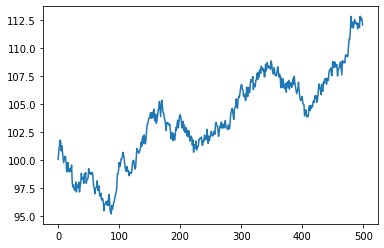

In [327]:
plt.plot(preds_500)

In [310]:
df['predictions'] = 0

In [311]:
len(preds_500)

500

In [312]:
new_df = df
for i in range(len(preds_500)):
    new_df = new_df.append({'predictions':preds_500[i]}, ignore_index=True)

In [313]:
new_df

,Open,High,Low,Close,Adj Close,Volume,predictions
0,24.500000,24.690001,24.49,24.60,21.390455,2900.0,0.000000
1,24.600000,24.600000,24.57,24.57,21.364367,1200.0,0.000000
2,24.500000,24.660000,24.50,24.58,21.373068,4600.0,0.000000
3,24.430000,24.430000,24.41,24.41,21.225248,2600.0,0.000000
4,24.129999,24.160000,24.07,24.07,20.929607,37400.0,0.000000
...,...,...,...,...,...,...,...
2745,NaN,NaN,NaN,NaN,NaN,NaN,112.868612
2746,NaN,NaN,NaN,NaN,NaN,NaN,112.538495
2747,NaN,NaN,NaN,NaN,NaN,NaN,112.753806
2748,NaN,NaN,NaN,NaN,NaN,NaN,112.558986


In [314]:
df_3 = pd.read_csv('data/VFV_TO_3.csv', header=0, parse_dates=True, squeeze=True)

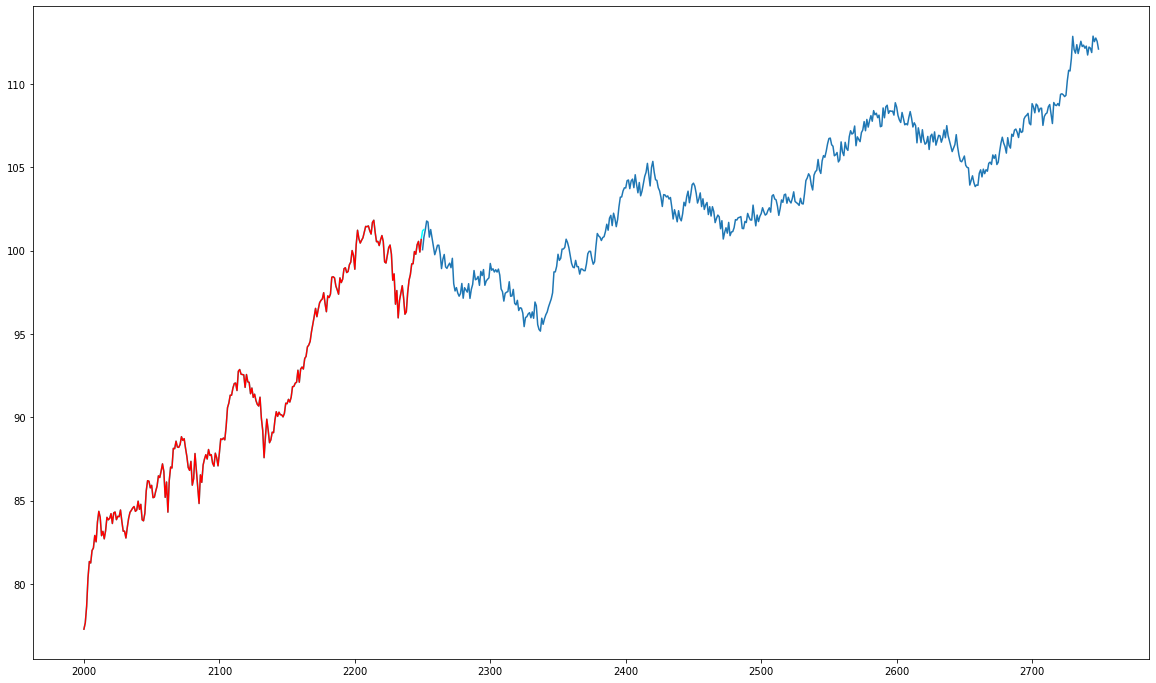

In [321]:
fig, ax = plt.subplots(figsize=(20,12))
ax.plot(new_df['predictions'][2250:])
ax.plot(df_3['Close'][2000:], color='cyan')
ax.plot(new_df['Close'][2000:2250], color='red')
#ax.plot(train)

In [295]:
df_3

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-11-09,24.500000,24.690001,24.490000,24.600000,21.390459,2900
1,2012-11-12,24.600000,24.600000,24.570000,24.570000,21.364367,1200
2,2012-11-13,24.500000,24.660000,24.500000,24.580000,21.373068,4600
3,2012-11-14,24.430000,24.430000,24.410000,24.410000,21.225245,2600
4,2012-11-15,24.129999,24.160000,24.070000,24.070000,20.929605,37400
...,...,...,...,...,...,...,...
2247,2021-10-26,100.540001,101.019997,100.500000,100.550003,100.550003,119600
2248,2021-10-27,100.800003,101.019997,99.889999,99.910004,99.910004,174400
2249,2021-10-28,100.190002,100.660004,100.190002,100.660004,100.660004,89200
2250,2021-10-29,100.400002,101.300003,100.379997,101.190002,101.190002,106000
